In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

In [2]:
def load_action_history(choice, random_seed, polytype, prefix="action_history"):

    filename = os.path.join(prefix, "action_history_polytype{}_choice{}_seed{:05d}.pickle".format(polytype,choice, random_seed))
    with open(filename,"rb") as f:
        actions = pickle.load(f)
        
    return actions

def make_len_list(choice, polytype, random_seed_max=100, ):
    len_list = []
    for random_seed in range(random_seed_max):
        actions = load_action_history(choice, random_seed, polytype)
        # print(g_random_seed, len(g_actions))
        len_list.append(len(actions))
    return sorted(len_list)

def make_lenN_list(choice, polytype, Ntop_list, Nlist = [3,5,10], random_seed_max=100, ):
    lenN_list = {}
    for Ntop in Nlist:
        lenN_list.update({Ntop: []})
        for random_seed in range(100):
            actions = load_action_history(choice, random_seed, polytype)
            ipos_list = []
            for i in range(Ntop):
                ipos = np.where(actions == Ntop_list[i])[0]
                if ipos.shape[0]>0:
                    cei_val = int(math.ceil(ipos[0]*2/10)/2*10)
                    ipos_list.append(cei_val)
            m = np.min(ipos_list)
            lenN_list[Ntop].append(m)

        lenN_list[Ntop] = sorted(lenN_list[Ntop])
    return lenN_list

def make_df(len_list, lenN_list, Nall, Nlist=[3,5,10], percent_list = [68,95], ):
    x_list = []
    p_list = []
    for p in percent_list:
        print("{}% {} iteration ({}%)".format(p, len_list[p], len_list[p]/Nall*100))
        p_list.extend([len_list[p], len_list[p]/Nall*100])
    p_list.append("top 1")
    x_list.append(p_list)
    for Ntop in Nlist:
        p_list = []
        for p in percent_list:

            print("{}% {} iteration ({}%)".format(p, lenN_list[Ntop][p], lenN_list[Ntop][p]/Nall*100))
            p_list.extend([ lenN_list[Ntop][p], lenN_list[Ntop][p]/Nall*100])
        p_list.append("any of top {}".format(Ntop))
        x_list.append(p_list)
    print(x_list)
    label_list = []
    for p in percent_list:
        label_list.append("N({}%)".format(p))
        label_list.append("ratio({}%)".format(p))
    label_list.append("label")
    df_topN = pd.DataFrame(x_list, columns=label_list)
    label_list_reordered = [label_list[-1]]
    label_list_reordered.extend(label_list[:-1])
    df_topN = df_topN[label_list_reordered]
    return df_topN

def plot_len(len_list, lenN_list, Ntop_list = [3,5,10]):
    plt.plot(len_list,"o-", label='top 1')
    for Ntop in Ntop_list:
        plt.plot(lenN_list[Ntop],"o-", label='any of top {}'.format(Ntop))
    plt.legend()
    plt.ylim((0,100))
    plt.title("{}, resitivity ratio".format(g_polytype))
    plt.ylabel("# of actions")
    plt.xlabel("# of trials")
    filename = "topN_polytype{}_choice{}.png".format(g_polytype, g_choice)
    plt.savefig(filename)
    print("save image to", filename)
    plt.show()

11 [12653 41647 41620  5352 35650 35993 27410 40499 27411 42025 26899]
68% 50 iteration (0.06803276457942145%)
95% 130 iteration (0.17688518790649577%)
68% 50 iteration (0.06803276457942145%)
95% 130 iteration (0.17688518790649577%)
68% 30 iteration (0.040819658747652865%)
95% 65 iteration (0.08844259395324788%)
68% 30 iteration (0.040819658747652865%)
95% 55 iteration (0.07483604103736359%)
[[50, 0.06803276457942145, 130, 0.17688518790649577, 'top 1'], [50, 0.06803276457942145, 130, 0.17688518790649577, 'any of top 3'], [30, 0.040819658747652865, 65, 0.08844259395324788, 'any of top 5'], [30, 0.040819658747652865, 55, 0.07483604103736359, 'any of top 10']]
save csv to topN_polytypebcc_choice1.csv


label  N(68%)  ratio(68%)  N(95%)  ratio(95%)
0          top 1      50    0.068033     130    0.176885
1   any of top 3      50    0.068033     130    0.176885
2   any of top 5      30    0.040820      65    0.088443
3  any of top 10      30    0.040820      55    0.074836

save image to topN_polytypebcc_choice1.png


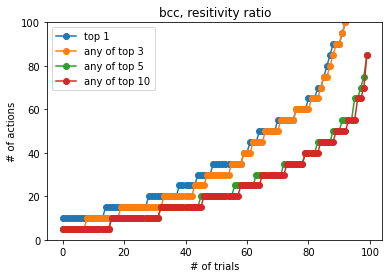

11 [12653 42025 40310 41620 40499 44688 35993 40498 41647 44517 32674]
68% 35 iteration (0.04762293520559501%)
95% 195 iteration (0.26532778185974365%)
68% 30 iteration (0.040819658747652865%)
95% 95 iteration (0.12926225270090075%)
68% 30 iteration (0.040819658747652865%)
95% 95 iteration (0.12926225270090075%)
68% 25 iteration (0.034016382289710725%)
95% 55 iteration (0.07483604103736359%)
[[35, 0.04762293520559501, 195, 0.26532778185974365, 'top 1'], [30, 0.040819658747652865, 95, 0.12926225270090075, 'any of top 3'], [30, 0.040819658747652865, 95, 0.12926225270090075, 'any of top 5'], [25, 0.034016382289710725, 55, 0.07483604103736359, 'any of top 10']]
save csv to topN_polytypefcc_choice1.csv


label  N(68%)  ratio(68%)  N(95%)  ratio(95%)
0          top 1      35    0.047623     195    0.265328
1   any of top 3      30    0.040820      95    0.129262
2   any of top 5      30    0.040820      95    0.129262
3  any of top 10      25    0.034016      55    0.074836

save image to topN_polytypefcc_choice1.png


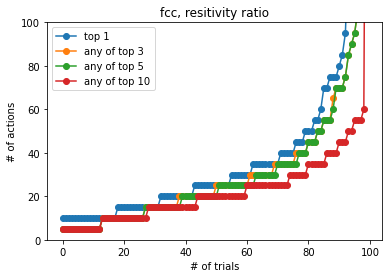

In [3]:
if __name__ == "__main__":
    
    for  g_polytype in ["bcc","fcc"]:
        g_choice = 1
        g_random_seed = -1
        # the number of all the data
        g_Nall = 73494

        g_Ntop_list = load_action_history(g_choice, g_random_seed, g_polytype)
        print(len(g_Ntop_list), g_Ntop_list  )

        g_len_list = make_len_list(g_choice, g_polytype)

        g_lenN_list = make_lenN_list(g_choice, g_polytype, g_Ntop_list)
        g_lenN_list.keys()

        g_df_topN = make_df(g_len_list, g_lenN_list, g_Nall)

        filename = "topN_polytype{}_choice{}.csv".format(g_polytype, g_choice)
        g_df_topN.to_csv(filename)
        print("save csv to", filename)

        display(g_df_topN)
        
        plot_len(g_len_list, g_lenN_list)